21064051_NguyenHungAnh

Week5

2.2 Image gradients

2.2.1 Prewitt filter

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

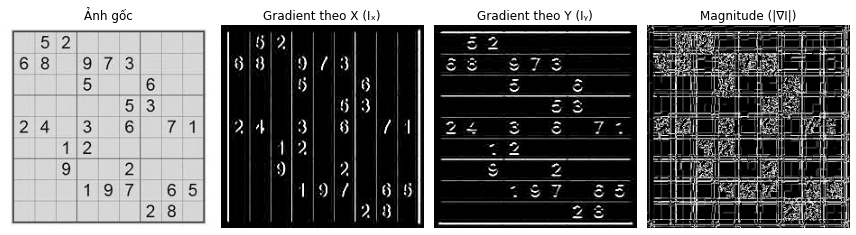

In [ ]:
# Đọc ảnh đầu vào
image = cv2.imread('C:/Users/Student/Downloads/images.jfif', cv2.IMREAD_GRAYSCALE)

# Định nghĩa bộ lọc Prewitt cho hướng X và Y
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Áp dụng bộ lọc Prewitt theo hướng X
grad_x = cv2.filter2D(image, -1, prewitt_x)

# Áp dụng bộ lọc Prewitt theo hướng Y
grad_y = cv2.filter2D(image, -1, prewitt_y)

# Tính toán độ lớn gradient (magnitude)
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = np.uint8(gradient_magnitude)

# Hiển thị ảnh gốc và các ảnh kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient theo X (Iₓ)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient theo Y (Iᵧ)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Magnitude (|∇I|)')
plt.axis('off')

plt.tight_layout()
plt.show()


2.2.2  Sobel filter

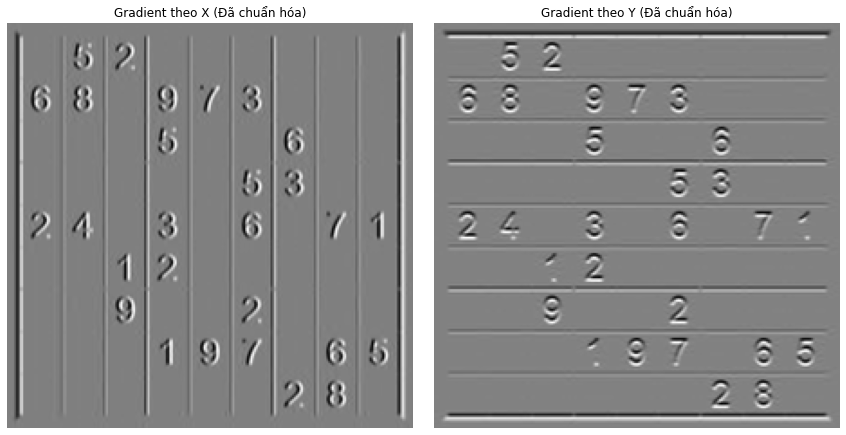

In [ ]:
# Áp dụng Sobel filter cho gradient theo X
sobel_x = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)

# Áp dụng Sobel filter cho gradient theo Y
sobel_y = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# Chuẩn hóa các gradient để nằm trong khoảng [0, 1]
sobel_x_normalized = cv2.normalize(sobel_x, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
sobel_y_normalized = cv2.normalize(sobel_y, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Hiển thị ảnh gradient
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sobel_x_normalized, cmap='gray')
plt.title('Gradient theo X (Đã chuẩn hóa)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_y_normalized, cmap='gray')
plt.title('Gradient theo Y (Đã chuẩn hóa)')
plt.axis('off')

plt.tight_layout()
plt.show()

2.2.3  Laplacian filter

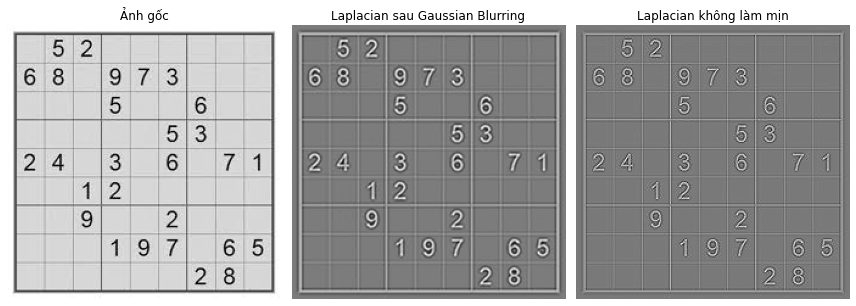

In [ ]:
# Áp dụng Gaussian blurring với kích thước kernel 3x3
blurred_image = cv2.GaussianBlur(image, (3, 3), sigmaX=0)

# Áp dụng bộ lọc Laplacian cho ảnh đã làm mịn
laplacian_blurred = cv2.Laplacian(blurred_image, ddepth=cv2.CV_32F)

# Chuẩn hóa ảnh Laplacian để nằm trong khoảng [0, 1]
laplacian_blurred_normalized = cv2.normalize(laplacian_blurred, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Áp dụng bộ lọc Laplacian cho ảnh gốc mà không có làm mịn
laplacian_original = cv2.Laplacian(image, ddepth=cv2.CV_32F)

# Chuẩn hóa ảnh Laplacian từ ảnh gốc để nằm trong khoảng [0, 1]
laplacian_original_normalized = cv2.normalize(laplacian_original, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Hiển thị kết quả
plt.figure(figsize=(12, 6))

# Ảnh gốc
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

# Ảnh đã qua làm mịn và áp dụng Laplacian
plt.subplot(1, 3, 2)
plt.imshow(laplacian_blurred_normalized, cmap='gray')
plt.title('Laplacian sau Gaussian Blurring')
plt.axis('off')

# Ảnh đã áp dụng Laplacian mà không làm mịn
plt.subplot(1, 3, 3)
plt.imshow(laplacian_original_normalized, cmap='gray')
plt.title('Laplacian không làm mịn')
plt.axis('off')

plt.tight_layout()
plt.show()


Edge_Filter_Example

In [ ]:
Robert Cross

SyntaxError: invalid syntax (<ipython-input-15-2389c4cb7dad>, line 1)

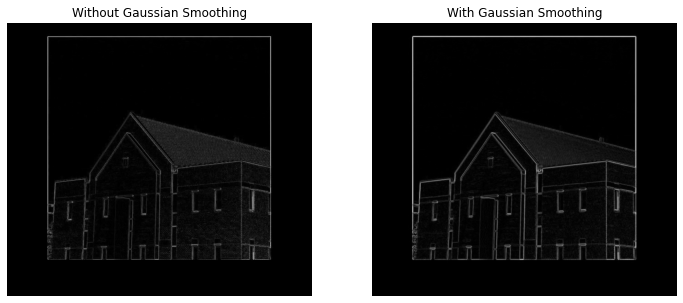

In [ ]:
# Read the image in grayscale
img = cv2.imread('C:/Users/Student/Desktop/IP/Image/building.jpg', cv2.IMREAD_GRAYSCALE)

# Define Robert Cross Kernels
kernel_x = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]], dtype=np.float32)

# Function to apply Robert Cross filter
def apply_robert_cross(image):
    grad_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)
    img_gradient = np.abs(grad_x) + np.abs(grad_y)
    return img_gradient

# Case 1: Without Gaussian Smoothing
img_gradient_no_smoothing = apply_robert_cross(img)

# Case 2: With Gaussian Smoothing (3x3 kernel)
img_smoothed = cv2.GaussianBlur(img, (3, 3), 0)
img_gradient_with_smoothing = apply_robert_cross(img_smoothed)

# Normalize both results to [0, 255]
img_gradient_no_smoothing = cv2.normalize(img_gradient_no_smoothing, None, 0, 255, cv2.NORM_MINMAX)
img_gradient_with_smoothing = cv2.normalize(img_gradient_with_smoothing, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for display
img_gradient_no_smoothing = np.uint8(img_gradient_no_smoothing)
img_gradient_with_smoothing = np.uint8(img_gradient_with_smoothing)

# Display both results side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gradient_no_smoothing, cmap='gray')
plt.title('Without Gaussian Smoothing')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_gradient_with_smoothing, cmap='gray')
plt.title('With Gaussian Smoothing')

plt.show()

Prewitt

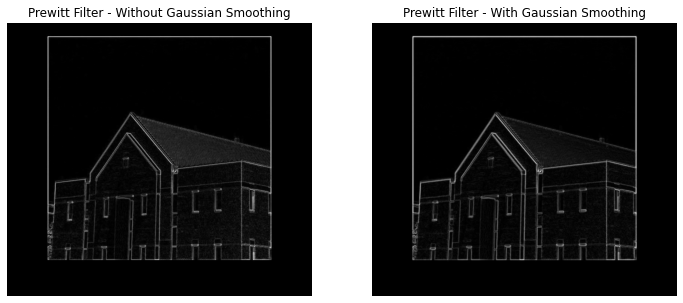

In [ ]:

# Read the image in grayscale
img = cv2.imread("C:/Users/Student/Desktop/IP/Image/building.jpg", cv2.IMREAD_GRAYSCALE)

# Define Prewitt Kernels
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

# Function to apply Prewitt filter
def apply_prewitt_filter(image):
    grad_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)
    img_gradient = np.abs(grad_x) + np.abs(grad_y)
    return img_gradient

# Case 1: Without Gaussian Smoothing
img_gradient_no_smoothing = apply_prewitt_filter(img)

# Case 2: With Gaussian Smoothing (3x3 kernel)
img_smoothed = cv2.GaussianBlur(img, (3, 3), 0)
img_gradient_with_smoothing = apply_prewitt_filter(img_smoothed)

# Normalize both results to [0, 255]
img_gradient_no_smoothing = cv2.normalize(img_gradient_no_smoothing, None, 0, 255, cv2.NORM_MINMAX)
img_gradient_with_smoothing = cv2.normalize(img_gradient_with_smoothing, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for display
img_gradient_no_smoothing = np.uint8(img_gradient_no_smoothing)
img_gradient_with_smoothing = np.uint8(img_gradient_with_smoothing)

# Display both results side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gradient_no_smoothing, cmap='gray')
plt.title('Prewitt Filter - Without Gaussian Smoothing')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(img_gradient_with_smoothing, cmap='gray')
plt.title('Prewitt Filter - With Gaussian Smoothing')

plt.show()

Sobel

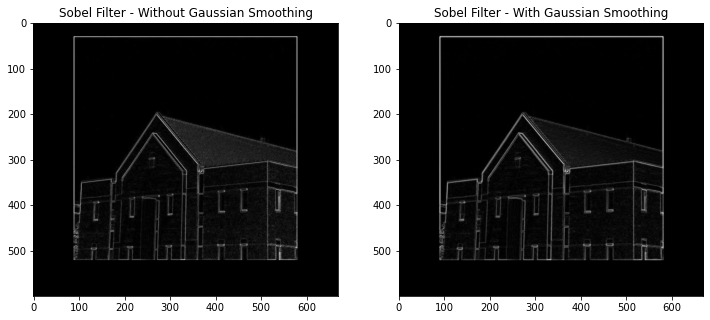

In [ ]:

# Read the image in grayscale
img = cv2.imread('C:/Users/Student/Desktop/IP/Image/building.jpg', cv2.IMREAD_GRAYSCALE)

# Define Sobel Kernels
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# Function to apply Sobel filter
def apply_sobel_filter(image):
    grad_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)
    img_gradient = np.abs(grad_x) + np.abs(grad_y)
    return img_gradient

# Case 1: Without Gaussian Smoothing
img_gradient_no_smoothing = apply_sobel_filter(img)

# Case 2: With Gaussian Smoothing (3x3 kernel)
img_smoothed = cv2.GaussianBlur(img, (3, 3), 0)
img_gradient_with_smoothing = apply_sobel_filter(img_smoothed)

# Normalize both results to [0, 255]
img_gradient_no_smoothing = cv2.normalize(img_gradient_no_smoothing, None, 0, 255, cv2.NORM_MINMAX)
img_gradient_with_smoothing = cv2.normalize(img_gradient_with_smoothing, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for display
img_gradient_no_smoothing = np.uint8(img_gradient_no_smoothing)
img_gradient_with_smoothing = np.uint8(img_gradient_with_smoothing)

# Display both results side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gradient_no_smoothing, cmap='gray')
plt.title('Sobel Filter - Without Gaussian Smoothing')

plt.subplot(1, 2, 2)
plt.imshow(img_gradient_with_smoothing, cmap='gray')
plt.title('Sobel Filter - With Gaussian Smoothing')

plt.show()